In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mp
import streamlit as st
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [2]:
benin_data = pd.read_csv(r"C:\Users\Sima\Desktop\AIM-ML\Week-0\data\benin-malanville.csv")
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
benin_data.shape

(525600, 19)

In [5]:
data_types = benin_data.dtypes
data_types

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [6]:
missing_values = benin_data.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
benin_data.duplicated().sum()

0

In [8]:
benin_data.drop('Comments', axis=1)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9


In [9]:
summary_stats = benin_data.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%        

In [11]:

# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = benin_data[(benin_data['GHI'] < 0) | (benin_data['DNI'] < 0) | (benin_data['DHI'] < 0)]
print("Outliers:\n", outliers)

Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDst

In [11]:
#count_model = benin_data.groupby("BP")["GHI"].sum().reset_index()
#sorted_model = count_BP.sort_values("GHI", ascending=False)
#lead_GHI = sorted_BP.head(10)
#lead_GHI

In [12]:
average_ghi = benin_data['GHI'].mean()
average_tamb = benin_data['Tamb'].mean()

In [13]:
print(f"Average GHI: {average_ghi}")
print(f"Average Ambient Temperature: {average_tamb}")

Average GHI: 240.559452435312
Average Ambient Temperature: 28.179682838660575


# **Descriptive Analysis**

In [4]:
# Convert Timestamp to datetime
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])

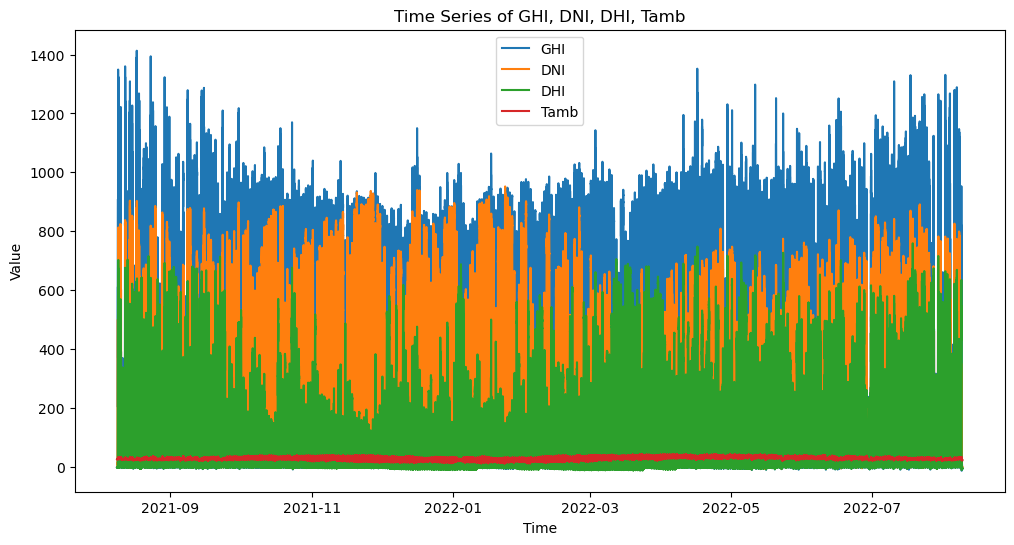

In [5]:
# Plot time series for GHI, DNI, DHI, Tamb
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(benin_data['Timestamp'], benin_data['GHI'], label='GHI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['DNI'], label='DNI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['DHI'], label='DHI')
mp.pyplot.plot(benin_data['Timestamp'], benin_data['Tamb'], label='Tamb')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('Value')
mp.pyplot.title('Time Series of GHI, DNI, DHI, Tamb')
mp.pyplot.legend()
mp.pyplot.show()

C:\Users\Sima\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


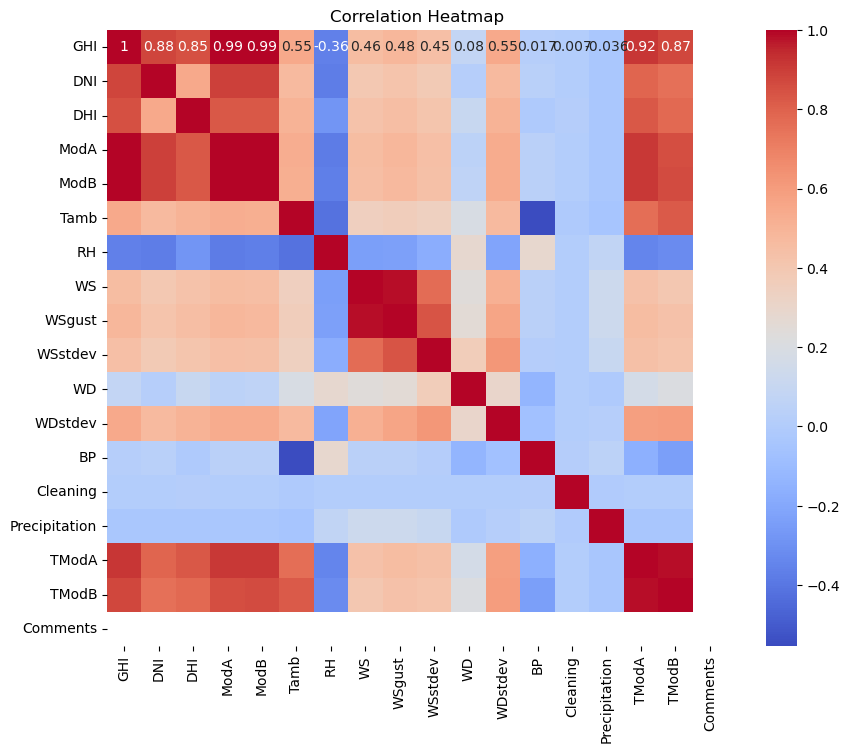

In [6]:
# Correlation heatmap
mp.pyplot.figure(figsize=(10, 8))
corr = benin_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.pyplot.title('Correlation Heatmap')
mp.pyplot.show()

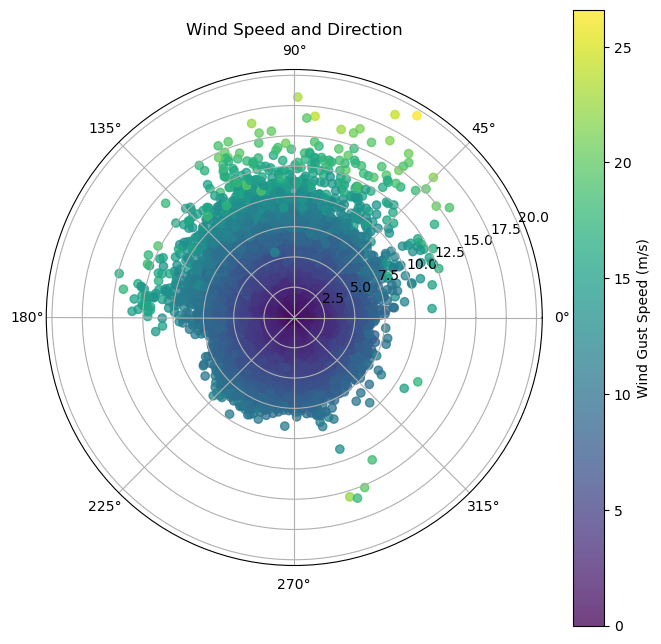

In [7]:
# Polar plot for wind speed and direction

mp.pyplot.figure(figsize=(8, 8))
mp.pyplot.subplot(projection='polar')
# mp.pyplot.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], cmap=mp.viridis, alpha=0.75)
mp.pyplot.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], alpha=0.75)
mp.pyplot.colorbar(label='Wind Gust Speed (m/s)')
mp.pyplot.title('Wind Speed and Direction')
mp.pyplot.show()

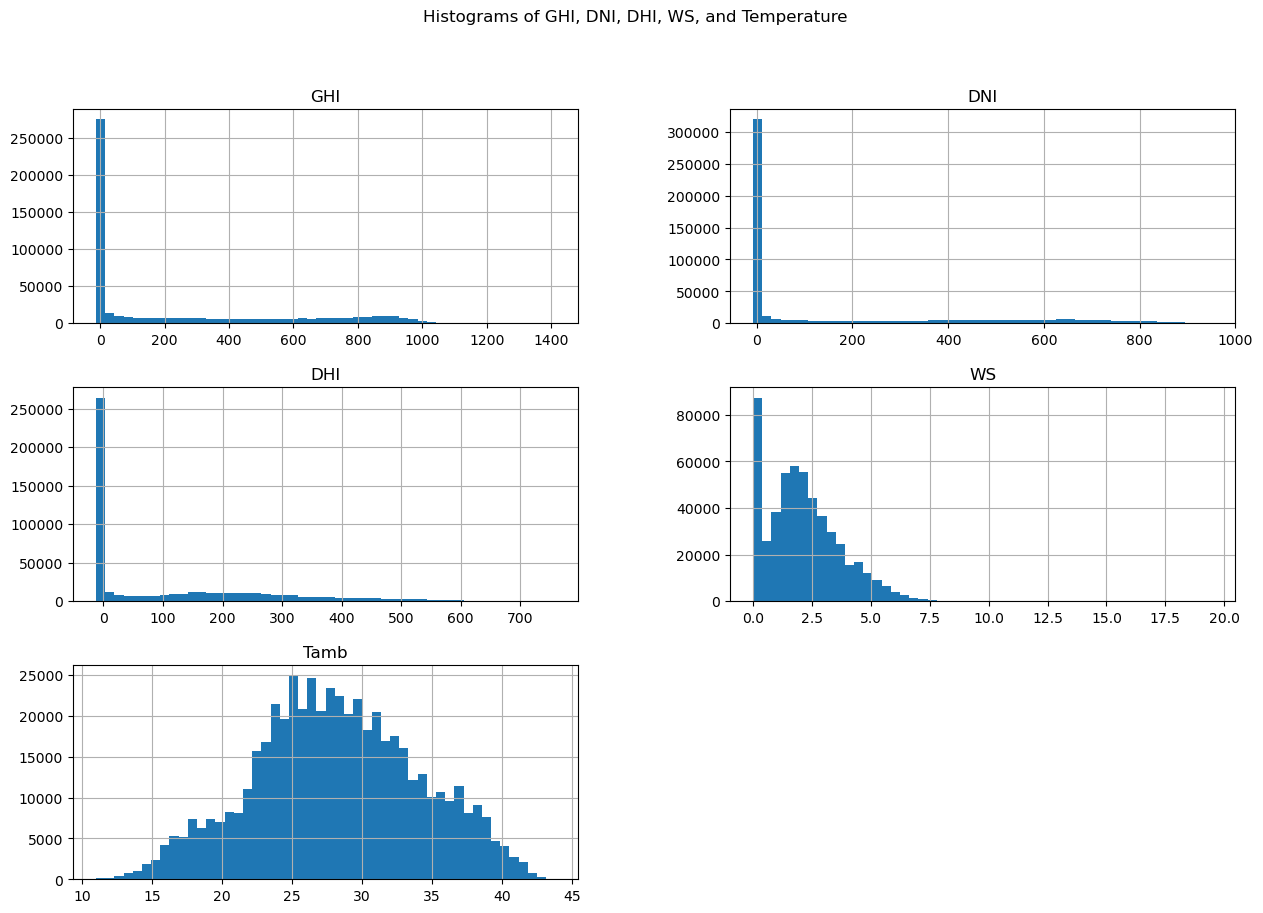

In [8]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
benin_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
mp.pyplot.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
mp.pyplot.show()

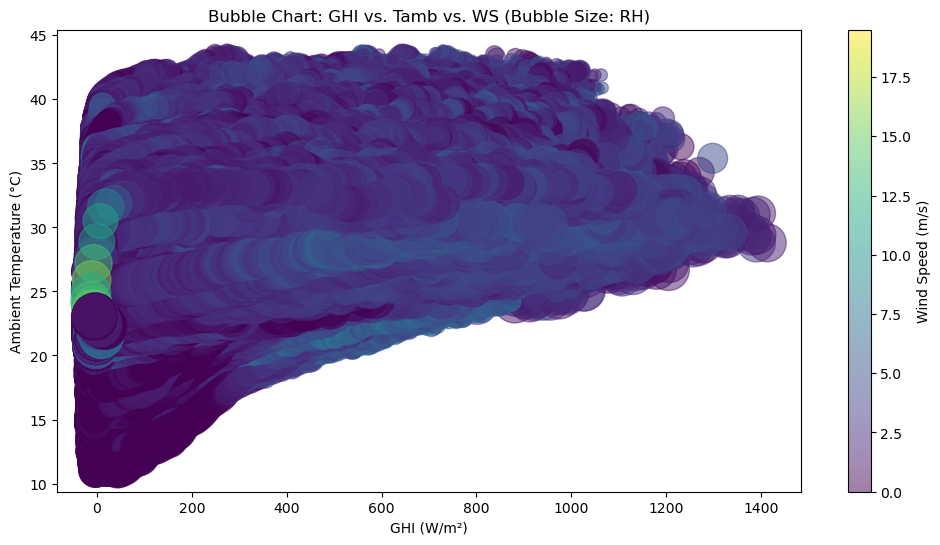

In [9]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(benin_data['GHI'], benin_data['Tamb'], s=benin_data['RH']*10, alpha=0.5, c=benin_data['WS'], cmap='viridis')
mp.pyplot.colorbar(label='Wind Speed (m/s)')
mp.pyplot.xlabel('GHI (W/m²)')
mp.pyplot.ylabel('Ambient Temperature (°C)')
mp.pyplot.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
mp.pyplot.show()

In [10]:
# 1) Drop rows with missing data
benin_data_cleaned = benin_data.dropna(axis=1, how='all')  
# print("Cleaned Data:\n", benin_data_cleaned.head())

In [12]:
# Drop columns with all missing values
benin_data_cleaned = benin_data.dropna(axis=1, how='all')
print("Cleaned Data (Columns):\n", benin_data_cleaned.head(20))

Cleaned Data (Columns):
              Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
5  2021-08-09 00:06:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4   
6  2021-08-09 00:07:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0   
7  2021-08-09 00:08:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3   
8  2021-08-09 00:09:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1   
9  2021-08-09 00:10:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1   
10 2021-08-09 00:11:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.6  0.2     1.1   
11 2021-08-09 00:12:00 -1.1 -0.2 -1.1  

In [16]:
# Perform a t-test on GHI values
from scipy import stats
t_stat, p_value = stats.ttest_ind(benin_data['GHI'], benin_data['DHI'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 247.19468929407608, p-value: 0.0


In [17]:
# Calculate the correlation matrix
correlation_matrix = benin_data.corr()
print(correlation_matrix)

               Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000  0.009829 -0.057211  0.065665 -0.024666 -0.027620   
GHI             0.009829  1.000000  0.882376  0.849989  0.994443  0.994869   
DNI            -0.057211  0.882376  1.000000  0.546602  0.892023  0.892012   
DHI             0.065665  0.849989  0.546602  1.000000  0.829923  0.827886   
ModA           -0.024666  0.994443  0.892023  0.829923  1.000000  0.998745   
ModB           -0.027620  0.994869  0.892012  0.827886  0.998745  1.000000   
Tamb            0.193871  0.547513  0.467584  0.503925  0.526868  0.525370   
RH             -0.105567 -0.360029 -0.373475 -0.285018 -0.383205 -0.365718   
WS              0.218608  0.457349  0.397099  0.426959  0.458483  0.450123   
WSgust          0.218099  0.484144  0.419469  0.450904  0.484429  0.476380   
WSstdev         0.175579  0.446526  0.383303  0.414711  0.443467  0.438523   
WD              0.167194  0.079664  0.018839  0.102752  0.050262

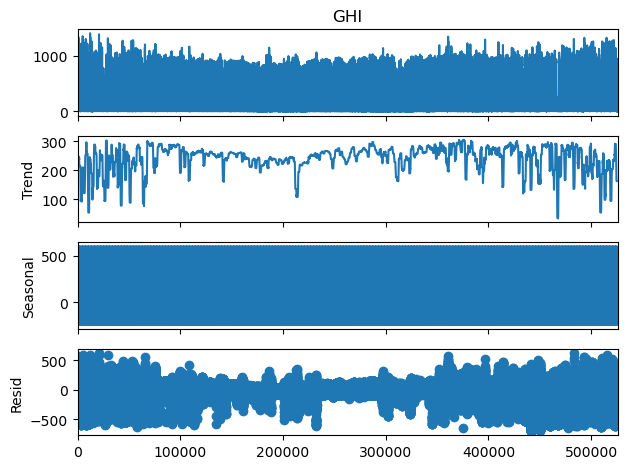

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(benin_data['GHI'], model='additive', period=1440)  # Assuming 1440 minutes in a day
result.plot()
plt.show()

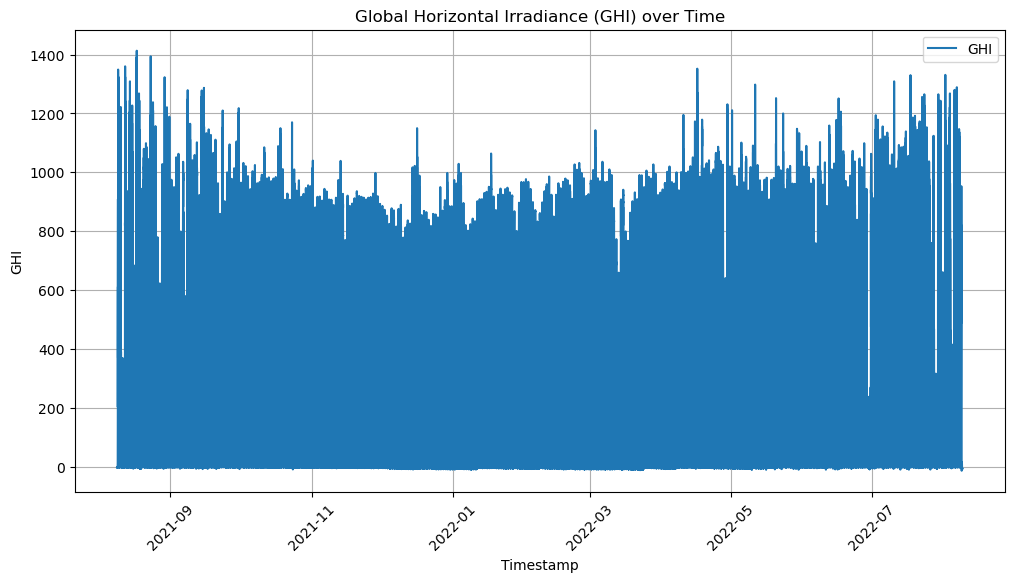

In [23]:
#Plotting Global Horizontal Irradiance (GHI) over time.

plt.figure(figsize=(12, 6))
plt.plot(benin_data['Timestamp'], benin_data['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

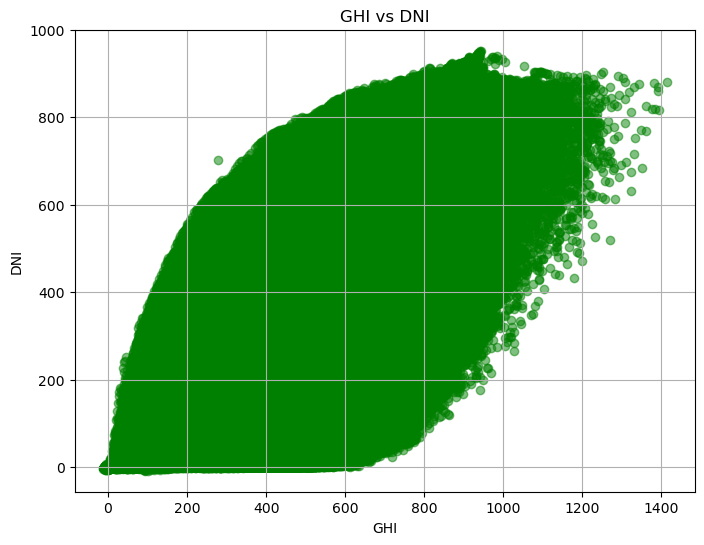

In [24]:
#Scatter-Plot:Showing the relationship between Global Horizontal Irradiance (GHI) and Direct Normal Irradiance (DNI)
plt.figure(figsize=(8, 6))
plt.scatter(benin_data['GHI'], benin_data['DNI'], alpha=0.5, color='green')
plt.title('GHI vs DNI')
plt.xlabel('GHI')
plt.ylabel('DNI')
plt.grid(True)
plt.show()

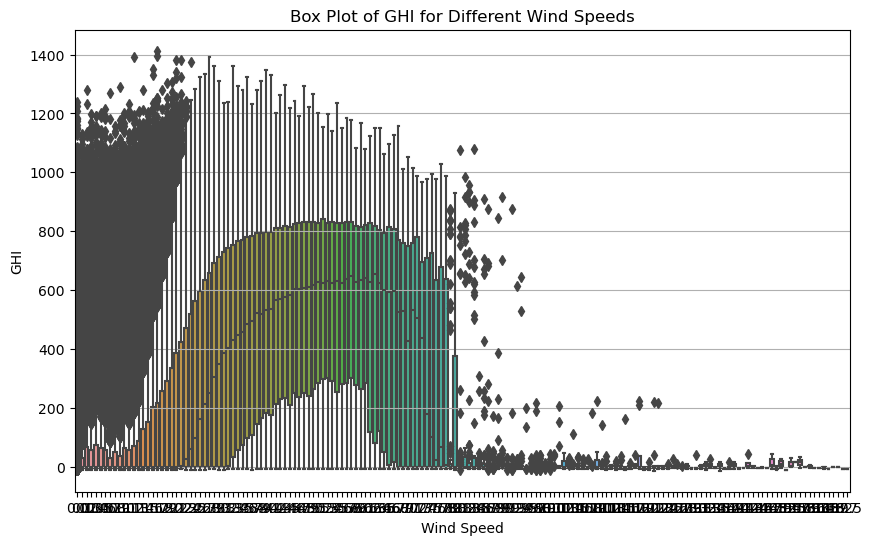

In [26]:
#Box Plot:Comparing the distribution of Global Horizontal Irradiance (GHI) for different Wind Speed categories.

plt.figure(figsize=(10, 6))
sns.boxplot(x=benin_data['WS'], y=benin_data['GHI'])
plt.title('Box Plot of GHI for Different Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('GHI')
plt.grid(axis='y')
plt.show()
